In [1]:
import os
from os.path import join

import numpy as np
import pandas as pd
import cv2
import seaborn as sns

import matplotlib.pyplot as plt

In [170]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_pickle("/content/drive/Shareddrives/TNT/정규세션/2022년 1학기/산업 인공지능/TASK2-wafer map /LSWMD.pkl")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_ = df
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [6]:
# wafter 반도차 산업에서 기초재료 (집적회로)
# wafter dieSize : 판때기 크기
# wafter Lot : Wafer 25장을 논리적으로 Lot이라 한다.
# wafter Index
# failure Type
df.sample(15)
# df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
290330,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",822.0,lot17776,21.0,[],[]
742963,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...",895.0,lot44762,21.0,[[Test]],[[none]]
131682,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3532.0,lot8614,3.0,[],[]
81554,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",1187.0,lot5864,9.0,[],[]
469188,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",710.0,lot28835,25.0,[],[]
195191,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1380.0,lot12406,17.0,[],[]
272278,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9796.0,lot16772,6.0,[],[]
723562,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2,...",518.0,lot43973,7.0,[[Test]],[[none]]
724840,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...",518.0,lot44024,10.0,[[Test]],[[none]]
413500,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3168.0,lot24601,24.0,[],[]


In [171]:
df.rename(columns = {'trianTestLabel':'TrainTestLabel'}, inplace = 'True')

print('[[Training]] dimension : ', df.TrainTestLabel[0].shape, '[] dimension : ', df.TrainTestLabel[52166].shape)

[[Training]] dimension :  (1, 1) [] dimension :  (0, 0)


In [ ]:
df.trainTestLabel[0][0][0]

'Training'

In [ ]:
def removebrackets(array):
    if array.shape == (1, 1):
        return array[0][0][0]
    elif array.shape == (0, 0):
        return None
        
df_['TrainTestLabel'] = df_['TrainTestLabel'].apply(removebrackets)
df_['failureType'] = df_['failureType'].apply(removebrackets)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   TrainTestLabel  172950 non-null  object 
 5   failureType     172950 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [ ]:
df_.sample(5)

,waferMap,dieSize,lotName,waferIndex,TrainTestLabel,failureType
654268,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",776.0,lot40924,21.0,T,n
273961,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",1139.0,lot16886,15.0,None,None
340134,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3642.0,lot20424,18.0,None,None
241146,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",556.0,lot15018,24.0,None,None
293715,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4096.0,lot17988,1.0,None,None


In [172]:
def removebrackets(array):
    if array.shape == (1, 1):
        return "".join(array[0])
    elif array.shape == (0, 0):
        return None
        
df['TrainTestLabel'] = df['TrainTestLabel'].apply(removebrackets)
df['failureType'] = df['failureType'].apply(removebrackets)

df.sample(10)

,waferMap,dieSize,lotName,waferIndex,TrainTestLabel,failureType
603303,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1513.0,lot37980,2.0,None,None
213311,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,...",682.0,lot13576,15.0,None,None
34164,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",741.0,lot3228,7.0,None,None
512204,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",733.0,lot31962,2.0,None,None
776408,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",822.0,lot46120,9.0,Test,Edge-Loc
626915,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...",712.0,lot39377,15.0,None,None
489678,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",710.0,lot30292,2.0,None,None
110733,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",776.0,lot7484,4.0,None,None
611184,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",710.0,lot38421,18.0,None,None
504418,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",710.0,lot31341,24.0,None,None


In [149]:
# None 값 카운트
df.isna().sum()

waferMap               0
dieSize                0
lotName                0
waferIndex             0
TrainTestLabel    638507
failureType       638507
dtype: int64

In [173]:
# dropna -> drop None
df_temp = df.dropna(axis = 0)
df = df_temp
df

,waferMap,dieSize,lotName,waferIndex,TrainTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,Training,none
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,Training,none
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,Training,none
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,Training,none
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,Training,none
...,...,...,...,...,...,...
811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,21.0,Test,Edge-Loc
811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,22.0,Test,Edge-Loc
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,Test,Edge-Ring
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,Test,Edge-Loc


In [174]:
df.reset_index(inplace = True)
df

,index,waferMap,dieSize,lotName,waferIndex,TrainTestLabel,failureType
0,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,Training,none
1,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,Training,none
2,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,Training,none
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,Training,none
4,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,Training,none
...,...,...,...,...,...,...,...
172945,811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,21.0,Test,Edge-Loc
172946,811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,22.0,Test,Edge-Loc
172947,811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,Test,Edge-Ring
172948,811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,Test,Edge-Loc


In [152]:
from tqdm import tqdm
for idx in tqdm(range(df.shape[0])):
  temp = df.failureType[idx]
  if temp == 'none':
    df.drop(idx, axis =0)
df
# 이건 아니자나.

  0%|          | 170/172950 [00:04<1:24:19, 34.15it/s]


KeyboardInterrupt: ignored

In [175]:
temp123 = df.failureType
temp123 = np.array(temp123).reshape(-1,1)

In [176]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = df.failureType[0],strategy= 'constant', fill_value= np.nan)
imputer.fit(temp123)
temp123 = imputer.transform(temp123)

In [177]:
df.failureType = temp123
df

,index,waferMap,dieSize,lotName,waferIndex,TrainTestLabel,failureType
0,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,Training,NaN
1,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,Training,NaN
2,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,Training,NaN
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,Training,NaN
4,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,Training,NaN
...,...,...,...,...,...,...,...
172945,811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,21.0,Test,Edge-Loc
172946,811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,22.0,Test,Edge-Loc
172947,811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,Test,Edge-Ring
172948,811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,Test,Edge-Loc


In [178]:
df_temp = df.dropna(axis = 0)
df = df_temp
df

,index,waferMap,dieSize,lotName,waferIndex,TrainTestLabel,failureType
19,19,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,20.0,Training,Loc
35,36,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,12.0,Training,Edge-Loc
36,37,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,13.0,Training,Edge-Loc
37,38,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,14.0,Training,Edge-Loc
38,39,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,15.0,Training,Edge-Loc
...,...,...,...,...,...,...,...
172945,811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,21.0,Test,Edge-Loc
172946,811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,22.0,Test,Edge-Loc
172947,811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,Test,Edge-Ring
172948,811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,Test,Edge-Loc


값 : [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25.] 
 빈도 : [1068  984 1017  958 1026 1027 1013  996  954 1009 1018 1061 1035 1014
 1056 1031 1014 1020  978 1004 1029 1072 1021 1039 1075]


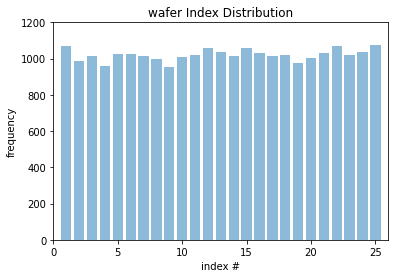

In [179]:
import matplotlib.pyplot as plt

uni_index = np.unique(df.waferIndex, return_counts = True)
print('값 :', uni_index[0],'\n','빈도 :',uni_index[1])
plt.bar(uni_index[0], uni_index[1], align ='center', alpha = 0.5)
plt.title("wafer Index Distribution")
plt.xlabel("index #")
plt.ylabel("frequency")
plt.xlim(0,26)
plt.ylim(0, 1200)
plt.show()

In [180]:
def find_dim(x):
  temp_dim1 = np.size(x, axis = 0)
  temp_dim2 = np.size(x, axis = 0)
  return temp_dim1, temp_dim2

df['waferMapDIm'] = df.waferMap.apply(find_dim)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,waferMap,dieSize,lotName,waferIndex,TrainTestLabel,failureType,waferMapDIm
19,19,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,20.0,Training,Loc,"(45, 45)"
35,36,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,12.0,Training,Edge-Loc,"(53, 53)"
36,37,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,13.0,Training,Edge-Loc,"(53, 53)"
37,38,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,14.0,Training,Edge-Loc,"(53, 53)"
38,39,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,15.0,Training,Edge-Loc,"(53, 53)"


In [181]:
df.groupby('waferMapDIm').size().sort_values(ascending=False)[:20]

waferMapDIm
(25, 25)      3167
(38, 38)      2404
(41, 41)      1694
(39, 39)      1692
(53, 53)      1651
(63, 63)      1479
(26, 26)      1256
(35, 35)      1144
(33, 33)       865
(30, 30)       783
(44, 44)       734
(29, 29)       631
(34, 34)       561
(43, 43)       557
(69, 69)       496
(32, 32)       490
(107, 107)     483
(46, 46)       468
(31, 31)       385
(56, 56)       371
dtype: int64

In [182]:
temp = pd.DataFrame(df.groupby('waferMapDIm').size().sort_values(ascending=False)[:], index = None)
N = temp.iloc[:,0].sum()

In [183]:
list = []
kiki = 0
for idx in range(temp.shape[0]):
  temp_value = temp.iloc[idx ,0]
  weight = temp_value / N
  list.append(np.array(temp.index[idx][0]) * weight)

weightAvg  = round(np.array(list).sum())

print('가중 평균 : ', weightAvg)

가중 평균 :  43


In [184]:
df.reset_index(inplace = True)
df

,level_0,index,waferMap,dieSize,lotName,waferIndex,TrainTestLabel,failureType,waferMapDIm
0,19,19,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,20.0,Training,Loc,"(45, 45)"
1,35,36,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,12.0,Training,Edge-Loc,"(53, 53)"
2,36,37,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,13.0,Training,Edge-Loc,"(53, 53)"
3,37,38,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,14.0,Training,Edge-Loc,"(53, 53)"
4,38,39,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,15.0,Training,Edge-Loc,"(53, 53)"
...,...,...,...,...,...,...,...,...,...
25514,172945,811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,21.0,Test,Edge-Loc,"(26, 26)"
25515,172946,811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,22.0,Test,Edge-Loc,"(26, 26)"
25516,172947,811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,Test,Edge-Ring,"(26, 26)"
25517,172948,811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,Test,Edge-Loc,"(26, 26)"


In [186]:
df = df.iloc[:,2:]
df

,waferMap,dieSize,lotName,waferIndex,TrainTestLabel,failureType,waferMapDIm
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,20.0,Training,Loc,"(45, 45)"
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,12.0,Training,Edge-Loc,"(53, 53)"
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,13.0,Training,Edge-Loc,"(53, 53)"
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,14.0,Training,Edge-Loc,"(53, 53)"
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,15.0,Training,Edge-Loc,"(53, 53)"
...,...,...,...,...,...,...,...
25514,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,21.0,Test,Edge-Loc,"(26, 26)"
25515,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,22.0,Test,Edge-Loc,"(26, 26)"
25516,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,Test,Edge-Ring,"(26, 26)"
25517,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,Test,Edge-Loc,"(26, 26)"


# dataframe에 이미지 넣는 작업이 됐다는 가정하에 진행

In [187]:
from PIL import Image
from tqdm import tqdm

temp_list = []

for idx in tqdm(range(df.shape[0])):
  temp = df.waferMap[idx]
  temp_image = Image.fromarray(temp)
  temp_image = temp_image.resize((weightAvg, weightAvg), Image.LANCZOS)
  temp_array = np.array(temp_image)
  temp_list.append(temp_array)

temp_list = np.array(temp_list)


image_dataset = temp_list
image_dataset.shape

100%|██████████| 25519/25519 [00:04<00:00, 6023.88it/s]


(25519, 43, 43)

In [188]:
df.waferMap = temp_list

AssertionError: ignored

In [191]:
df_frame_cropped = df.iloc[:,1:-1]
df_frame_cropped

,dieSize,lotName,waferIndex,TrainTestLabel,failureType
0,1683.0,lot1,20.0,Training,Loc
1,2460.0,lot2,12.0,Training,Edge-Loc
2,2460.0,lot2,13.0,Training,Edge-Loc
3,2460.0,lot2,14.0,Training,Edge-Loc
4,2460.0,lot2,15.0,Training,Edge-Loc
...,...,...,...,...,...
25514,600.0,lot47542,21.0,Test,Edge-Loc
25515,600.0,lot47542,22.0,Test,Edge-Loc
25516,600.0,lot47542,23.0,Test,Edge-Ring
25517,600.0,lot47542,24.0,Test,Edge-Loc


In [190]:
df_frame_cropped.TrainTestLabel.value_counts()
print('imbalance ratio',df_frame_cropped.TrainTestLabel.value_counts()[0]/ df_frame_cropped.TrainTestLabel.value_counts()[1] )

imbalance ratio 2.2327083861160375


In [192]:
df_frame_cropped.failureType.value_counts()

Edge-Ring    9680
Edge-Loc     5189
Center       4294
Loc          3593
Scratch      1193
Random        866
Donut         555
Near-full     149
Name: failureType, dtype: int64

In [193]:
temp = df_frame_cropped.loc[df_frame_cropped.TrainTestLabel == 'Training']
df_train_frame_cropped = temp
print('Number of train data : ', df_train_frame_cropped.shape[0])
df_train_frame_cropped.failureType.value_counts()/df_train_frame_cropped.shape[0] *100

Number of train data :  17625


Edge-Ring    48.533333
Center       19.642553
Edge-Loc     13.713475
Loc           9.191489
Random        3.455319
Scratch       2.836879
Donut         2.320567
Near-full     0.306383
Name: failureType, dtype: float64

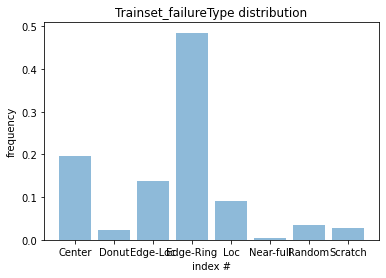

In [194]:
uni_Index=np.unique(df_train_frame_cropped.failureType, return_counts=True)
plt.bar(uni_Index[0], uni_Index[1]/df_train_frame_cropped.failureType.shape[0], align='center', alpha=0.5)
plt.title("Trainset_failureType distribution")
plt.xlabel("index #")
plt.ylabel("frequency")
plt.show()

In [195]:
temp = df_frame_cropped.loc[df_frame_cropped.TrainTestLabel == 'Test']
df_test_frame_cropped = temp
print('Number of train data : ', df_test_frame_cropped.shape[0])
df_test_frame_cropped.failureType.value_counts()/df_test_frame_cropped.shape[0] *100

Number of train data :  7894


Edge-Loc     35.115277
Loc          24.993666
Edge-Ring    14.263998
Center       10.539650
Scratch       8.778819
Random        3.255637
Donut         1.849506
Near-full     1.203446
Name: failureType, dtype: float64

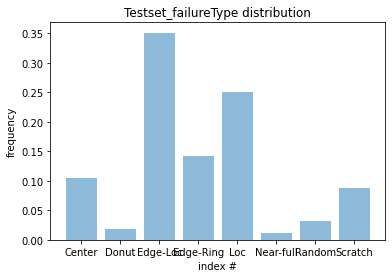

In [196]:
uni_Index=np.unique(df_test_frame_cropped.failureType, return_counts=True)
plt.bar(uni_Index[0], uni_Index[1]/df_test_frame_cropped.shape[0], align='center', alpha=0.5)
plt.title("Testset_failureType distribution")
plt.xlabel("index #")
plt.ylabel("frequency")
plt.show()

# 공정상에서 문제가 생기는 비율을 반영해서 trainset, Testset에 비중 둔건 아닌것같음. 목적에 맞게 많이 발생하고 치명적인 특징을 testset에 비중을 둘 순 있지만, 나뉸 ~~ 비중이 많은 정보가 더 빈번히 발생이 많다는 가정하에 두 분포의 비율을 비슷하게 가져가고싶음.

In [198]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df_frame_cropped, test_size =  df_test_frame_cropped.shape[0]/df_frame_cropped.shape[0] ,stratify = df_frame_cropped.failureType, shuffle = None)
trainset = trainset.reset_index()
testset = testset.reset_index()

In [199]:
trainset

,index,dieSize,lotName,waferIndex,TrainTestLabel,failureType
0,13193,737.0,lot23480,5.0,Training,Edge-Ring
1,13132,1080.0,lot23180,2.0,Training,Edge-Loc
2,4226,3036.0,lot10182,7.0,Training,Edge-Ring
3,24320,562.0,lot46734,15.0,Test,Edge-Loc
4,22479,1109.0,lot45565,19.0,Test,Edge-Loc
...,...,...,...,...,...,...
17619,15432,515.0,lot36718,6.0,Training,Center
17620,24109,1414.0,lot46408,11.0,Test,Loc
17621,15353,515.0,lot36695,9.0,Training,Center
17622,10364,1139.0,lot18808,24.0,Training,Edge-Loc


In [200]:
testset

,index,dieSize,lotName,waferIndex,TrainTestLabel,failureType
0,6373,1291.0,lot13703,2.0,Training,Edge-Ring
1,21658,518.0,lot44923,17.0,Training,Edge-Loc
2,16989,515.0,lot39675,20.0,Training,Center
3,13940,1080.0,lot26306,10.0,Training,Loc
4,15554,515.0,lot36752,17.0,Training,Center
...,...,...,...,...,...,...
7890,20518,1074.0,lot44163,3.0,Test,Edge-Ring
7891,13138,1080.0,lot23180,16.0,Training,Center
7892,2856,939.0,lot6119,2.0,Training,Edge-Loc
7893,22927,904.0,lot45639,14.0,Test,Center


In [201]:
for idx in tqdm(range(testset.shape[0])):
  temp = testset.TrainTestLabel[idx]
  if temp == 'Training':
    testset.TrainTestLabel[idx] = 'Test'
testset

  0%|          | 0/7895 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
100%|██████████| 7895/7895 [00:03<00:00, 2280.40it/s]


,index,dieSize,lotName,waferIndex,TrainTestLabel,failureType
0,6373,1291.0,lot13703,2.0,Test,Edge-Ring
1,21658,518.0,lot44923,17.0,Test,Edge-Loc
2,16989,515.0,lot39675,20.0,Test,Center
3,13940,1080.0,lot26306,10.0,Test,Loc
4,15554,515.0,lot36752,17.0,Test,Center
...,...,...,...,...,...,...
7890,20518,1074.0,lot44163,3.0,Test,Edge-Ring
7891,13138,1080.0,lot23180,16.0,Test,Center
7892,2856,939.0,lot6119,2.0,Test,Edge-Loc
7893,22927,904.0,lot45639,14.0,Test,Center


In [202]:
for idx in tqdm(range(trainset.shape[0])):
  temp = trainset.TrainTestLabel[idx]
  if temp == 'Test':
    trainset.TrainTestLabel[idx] = 'Training'
trainset

  0%|          | 0/17624 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
100%|██████████| 17624/17624 [00:03<00:00, 4708.11it/s]


,index,dieSize,lotName,waferIndex,TrainTestLabel,failureType
0,13193,737.0,lot23480,5.0,Training,Edge-Ring
1,13132,1080.0,lot23180,2.0,Training,Edge-Loc
2,4226,3036.0,lot10182,7.0,Training,Edge-Ring
3,24320,562.0,lot46734,15.0,Training,Edge-Loc
4,22479,1109.0,lot45565,19.0,Training,Edge-Loc
...,...,...,...,...,...,...
17619,15432,515.0,lot36718,6.0,Training,Center
17620,24109,1414.0,lot46408,11.0,Training,Loc
17621,15353,515.0,lot36695,9.0,Training,Center
17622,10364,1139.0,lot18808,24.0,Training,Edge-Loc


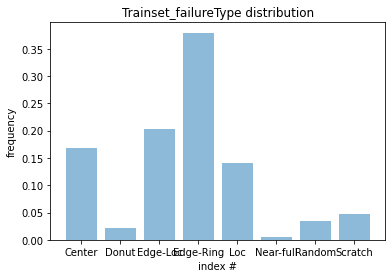

In [203]:
uni_Index=np.unique(trainset.failureType, return_counts=True)
plt.bar(uni_Index[0], uni_Index[1]/trainset.failureType.shape[0], align='center', alpha=0.5)
plt.title("Trainset_failureType distribution")
plt.xlabel("index #")
plt.ylabel("frequency")
plt.show()

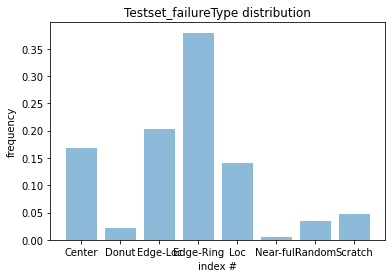

In [204]:
uni_Index=np.unique(testset.failureType, return_counts=True)
plt.bar(uni_Index[0], uni_Index[1]/testset.shape[0], align='center', alpha=0.5)
plt.title("Testset_failureType distribution")
plt.xlabel("index #")
plt.ylabel("frequency")
plt.show()

In [205]:
trainset.isnull().sum()

index             0
dieSize           0
lotName           0
waferIndex        0
TrainTestLabel    0
failureType       0
dtype: int64

In [206]:
testset.isnull().sum()

index             0
dieSize           0
lotName           0
waferIndex        0
TrainTestLabel    0
failureType       0
dtype: int64